- In this notebook, we discuss about Linear and Multi-Linear Regression by using iris dataset.

Importing some neccesory libraries for Linear Regression.

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Reading Dataset

In [5]:
iris = pd.read_csv("C:\\Users\\Shah Rukh\\Downloads\\iris.csv", index_col = "Id")
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


### Basic Data Analysis

In [6]:
iris[iris['SepalWidthCm']>4]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
16,5.7,4.4,1.5,0.4,Iris-setosa
33,5.2,4.1,1.5,0.1,Iris-setosa
34,5.5,4.2,1.4,0.2,Iris-setosa


In [7]:
iris[iris['PetalWidthCm']>2]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
101,6.3,3.3,6.0,2.5,Iris-virginica
103,7.1,3.0,5.9,2.1,Iris-virginica
105,6.5,3.0,5.8,2.2,Iris-virginica
106,7.6,3.0,6.6,2.1,Iris-virginica
110,7.2,3.6,6.1,2.5,Iris-virginica
113,6.8,3.0,5.5,2.1,Iris-virginica
115,5.8,2.8,5.1,2.4,Iris-virginica
116,6.4,3.2,5.3,2.3,Iris-virginica
118,7.7,3.8,6.7,2.2,Iris-virginica


In [8]:
iris[iris['PetalWidthCm']>1]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
51,7.0,3.2,4.7,1.4,Iris-versicolor
52,6.4,3.2,4.5,1.5,Iris-versicolor
53,6.9,3.1,4.9,1.5,Iris-versicolor
54,5.5,2.3,4.0,1.3,Iris-versicolor
55,6.5,2.8,4.6,1.5,Iris-versicolor
56,5.7,2.8,4.5,1.3,Iris-versicolor
57,6.3,3.3,4.7,1.6,Iris-versicolor
59,6.6,2.9,4.6,1.3,Iris-versicolor
60,5.2,2.7,3.9,1.4,Iris-versicolor


In [9]:
iris['PetalWidthCm']>2

Id
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
       ...  
121     True
122    False
123    False
124    False
125     True
126    False
127    False
128    False
129     True
130    False
131    False
132    False
133     True
134    False
135    False
136     True
137     True
138    False
139    False
140     True
141     True
142     True
143    False
144     True
145     True
146     True
147    False
148    False
149     True
150    False
Name: PetalWidthCm, Length: 150, dtype: bool

### Data Visualization

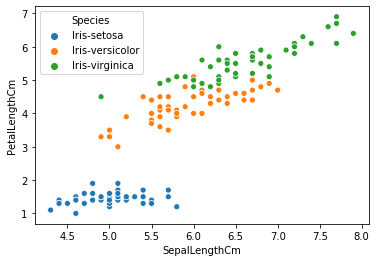

In [11]:
sns.scatterplot(x = 'SepalLengthCm', y = 'PetalLengthCm',  data = iris, hue = "Species")
plt.show()

# Modeling

## 1. Implimenting Linear Regression

### Depenedent Variable

In [12]:
y = iris[['SepalLengthCm']]

### Independent Variable

In [13]:
x = iris[['SepalWidthCm']]

In [14]:
x = iris[['SepalWidthCm']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [15]:
x_train.head()

,SepalWidthCm
Id,
19,3.8
36,3.2
2,3.0
43,3.2
121,3.2


In [16]:
x_test.head()

,SepalWidthCm
Id,
123,2.8
3,3.2
99,2.5
93,2.6
88,2.3


In [17]:
y_train.head()

,SepalLengthCm
Id,
19,5.7
36,5.0
2,4.9
43,4.4
121,6.9


In [18]:
y_test.head()

,SepalLengthCm
Id,
123,7.7
3,4.7
99,5.1
93,5.8
88,6.3


In [19]:
lr = LinearRegression()

In [20]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
y_pred=lr.predict(x_test)

### Comparing actual and predicted values

In [22]:
y_test.head(),y_pred[0:5]

(     SepalLengthCm
 Id                
 123            7.7
 3              4.7
 99             5.1
 93             5.8
 88             6.3, array([[5.8959519 ],
        [5.85189137],
        [5.92899729],
        [5.91798216],
        [5.95102755]]))

### Finding Errors in Predictoin

In [24]:
mean_squared_error(y_test,y_pred)

0.5735470875121023

## 2. Implementing multiple linear regression

In [25]:
y = iris[['SepalLengthCm']]

In [26]:
x = iris[['SepalWidthCm','PetalLengthCm','PetalWidthCm']]

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [29]:
lr2 = LinearRegression()

In [30]:
lr2.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- Prediction

In [31]:
y_pred=lr2.predict(x_test)

### Comparing predicted and actual values

In [32]:
y_test.head(),y_pred[0:5]

(     SepalLengthCm
 Id                
 98             6.2
 149            6.2
 138            6.4
 93             5.8
 26             5.0, array([[6.04350342],
        [6.61312282],
        [6.74761238],
        [5.68468029],
        [4.81852242]]))

### Finding Error in Prediction

In [33]:
mean_squared_error(y_test,y_pred)

0.09277213633257554

### By comparing both errors we notice that Second model(Multi-Linear Regression) is better than first model(Linear Regression).